# Problem statement 1: Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. Draw the inferences from the clusters obtained.

In [1]:
import pandas as pd

In [79]:
airline = pd.read_excel("EastWestAirlines.xlsx")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [80]:
airline.rename(columns={"Award?":"Award","ID#":"ID"},inplace=True)

In [81]:
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [82]:
#normalise the data
#apply h clustering to it

In [83]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [84]:
df_norm= norm(airline.iloc[::,0:11:])
df_norm

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


In [85]:
#hierarchical clustering

In [86]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [125.0, 125.0, 135.0, 135.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [185.0, 185.0, 195.0, 195.0],
  [153.75, 153.75, 190.0, 190.0],
  [130.0, 130.0, 171.875, 171.875],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [205.0, 205.0, 223.75, 223.75],
  [150.9375, 150.9375, 214.375, 214.375],
  [115.0, 115.0, 182.65625, 182.65625],
  [105.0, 105.0, 148.828125, 148.828125],
  [295.0, 295.0, 305.0, 305.0],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [375.0, 375.0, 392.5, 392.5],
  [365.0, 365.0, 383.75, 383.75],
  [355.0, 355.0, 374.375, 374.375],
  [345.0, 345.0, 364.6875, 364.6875],
  [415.0, 415.0, 425.0, 425.0],
  [445.0, 445.0, 455.0, 455.0],
  [435.0, 435.0, 450.0, 450.0],
  [485.0, 485.0, 495.0, 495.0],
  [475.0, 475.0, 490.0, 490.0],
  [505.0, 505.0, 515.0, 515.0],
  [482.5, 482.5, 510.0, 510.0],
  [465.0, 465.0, 4

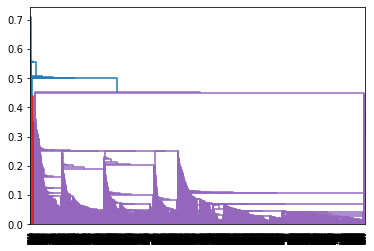

In [16]:
sch.dendrogram(sch.linkage(df_norm,method='single'))

In [88]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [89]:
y_hc =hc.fit_predict(df_norm)

In [90]:
airline['h_clusterid'] = y_hc 
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [91]:
#K-Means

In [92]:
kmean =KMeans(n_clusters=3)

In [93]:
k_clusturoid=kmean.fit_predict(df_norm)

In [94]:
airline['k_clusturoid']= k_clusturoid

In [95]:
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,k_clusturoid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1


In [96]:
airline.k_clusturoid.value_counts()

1    1591
2    1214
0    1194
Name: k_clusturoid, dtype: int64

In [97]:
#DBSCAN

In [98]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [99]:
db = DBSCAN(eps=0.5,min_samples=3)

In [100]:
db_clusturoid= db.fit_predict(df_norm)

In [101]:
airline['db_clusturoid']= db_clusturoid

In [102]:
airline

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,k_clusturoid,db_clusturoid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,1,0


In [103]:
#finding the optimum number of clusters

In [104]:
nc=[2,3,4,5,6,7,8,9,10,11,12,13]
iner=[]    
for i in nc:
    km=KMeans(i)
    km.fit(df_norm)
    iner.append(km.inertia_)

In [105]:
iner

[758.6670746066101,
 467.54355844811283,
 356.99211763392236,
 304.94586191101234,
 275.8549080595954,
 254.32131171840686,
 237.08867204043838,
 222.26293600932598,
 209.03368808457697,
 196.14817011560723,
 186.88170022762313,
 178.2766591568029]

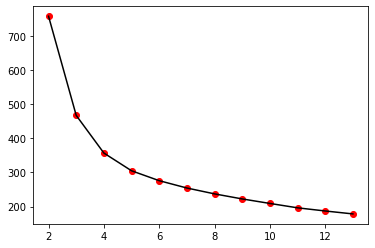

In [106]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

In [108]:
# So optimum clusters are 3

# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [40]:
crime = pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [41]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [42]:
df_norm1 = norm(crime.iloc[::,1:5:])
df_norm1

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [43]:
#hierarchical clustering

In [44]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [60.0, 60.0, 83.75, 83.75],
  [45.0, 45.0, 71.875, 71.875],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [122.5, 122.5, 153.75, 153.75],
  [245.0, 245.0, 255.0, 255.0],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360.0, 360.0],
  [335.0, 335.0, 352.5, 352.5],
  [325.0, 325.0, 343.75, 343.75],
  [315.0, 315.0, 334.375, 334.375],
  [375.0, 375.0, 385.0, 385.0],
  [405.0, 405.0, 415.0, 415.0],
  [395.0, 395.0, 410.0, 410.0],
  [380.0, 380.0, 402.5, 402.5],
  [324.6875, 324.6875, 391.25, 391.25],
  [305.0, 305.0, 357.96875, 357.96875],
  [295.0, 295.0, 331.484375, 331.484375],
  [285.0, 285.0, 313.2421875, 313.2421875],
  [275.0, 275.0, 299.12109375, 299.12109375],
  [265.0, 265.0, 287.060546875, 287.060546875],
  [250.0, 250.0, 276.0302734375,

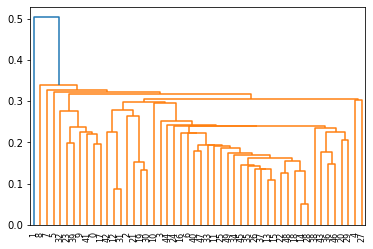

In [45]:
sch.dendrogram(sch.linkage(df_norm1,method='single',metric='euclidean'))

In [46]:
hc1= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [47]:
hc1_clusturing= hc1.fit_predict(df_norm1)

In [48]:
crime["hc1_clusturing"]= hc1_clusturing

In [49]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc1_clusturing
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,0


In [50]:
#Kmeans

In [51]:
km1= KMeans(n_clusters=3)

In [52]:
km1_clusturing= km1.fit_predict(df_norm1)

In [53]:
crime["km1_clusturing"]= km1_clusturing

In [54]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc1_clusturing,km1_clusturing
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,1,0
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,0,2
7,Delaware,5.9,238,72,15.8,0,2
8,Florida,15.4,335,80,31.9,2,0
9,Georgia,17.4,211,60,25.8,0,0


In [55]:
#DBSCAN

In [56]:
from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [57]:
db1=DBSCAN(eps=0.5,min_samples=3)

In [58]:
db1_clusturing = db1.fit_predict(df_norm1)

In [59]:
crime["db1_clusturing"]=db1_clusturing

In [60]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,hc1_clusturing,km1_clusturing,db1_clusturing
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,1,0,-1
2,Arizona,8.1,294,80,31.0,0,0,0
3,Arkansas,8.8,190,50,19.5,0,2,0
4,California,9.0,276,91,40.6,0,0,0
5,Colorado,7.9,204,78,38.7,0,0,0
6,Connecticut,3.3,110,77,11.1,0,2,0
7,Delaware,5.9,238,72,15.8,0,2,0
8,Florida,15.4,335,80,31.9,2,0,0
9,Georgia,17.4,211,60,25.8,0,0,0


In [61]:
#optimum number of clusters

In [62]:
nc1=[2,3,4,5,6,7,8,9,10,11,12,13]
iner1=[]    
for i in nc1:
    km1=KMeans(i)
    km1.fit(df_norm1)
    iner1.append(km1.inertia_)

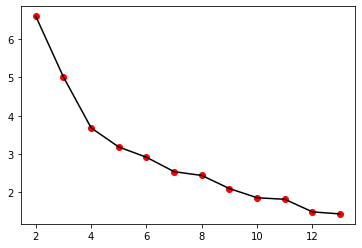

In [63]:
plt.plot(nc1,iner1,color='black')
plt.scatter(nc1,iner1,color='red')

In [64]:
# so three are the optimum clusters as change is maximum